In [1]:
%matplotlib inline
%env LOGURU_LEVEL=INFO

env: LOGURU_LEVEL=INFO


In [2]:
import torch
from torch.nn import CrossEntropyLoss, Linear, Module, ReLU, Sequential
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

from smolai import Trainer
from smolai.callbacks.report import ReportMetricsWithLogger, RealTimeLoss
from smolai.metrics import Accuracy, Loss
from smolai.callbacks.lr import LrFinder

In [3]:
train_ds = MNIST(root="data", train=True, download=True, transform=ToTensor())
train_dl = DataLoader(train_ds, batch_size=256, shuffle=True)
test_ds = MNIST(root="data", train=False, download=True, transform=ToTensor())
test_dl = DataLoader(test_ds, batch_size=256, shuffle=False)

In [4]:
class MnistModel(Module):
    def __init__(self) -> None:
        super().__init__()
        self.net = Sequential(
            Linear(28 * 28, 30),
            ReLU(),
            Linear(30, 10),
        )

    def forward(self, xb):
        return self.net(xb.view(xb.size(0), -1))

In [5]:
model = MnistModel()
criterion=CrossEntropyLoss()

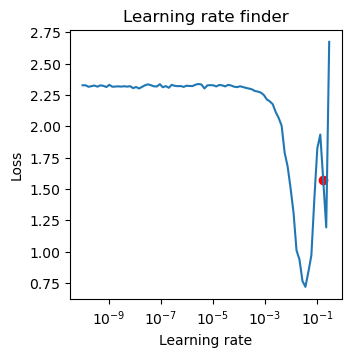

In [6]:
lrf = LrFinder()
trainer = Trainer(
    model=MnistModel(),
    criterion=CrossEntropyLoss(),
    opt_func=torch.optim.AdamW,
    callbacks=[lrf, Loss],
).fit(train_dl=train_dl, lr=1e-10)
lrf.plot()

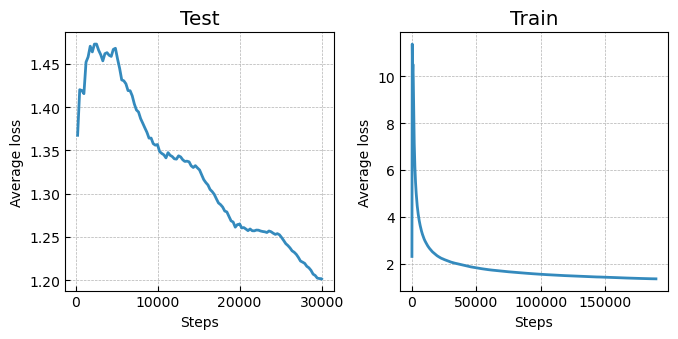

In [ ]:
trainer = Trainer(
    model=MnistModel(),
    criterion=CrossEntropyLoss(),
    opt_func=torch.optim.AdamW,
    callbacks=[RealTimeLoss, Loss],
).fit(
    train_dl=train_dl,
    test_dl=test_dl,
    lr=lrf.suggest().lr,
    n_epochs=5,
)